In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
train_df = pd.read_csv('train - train.csv')
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
# using iterative imputaion with sklearn
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Initialize IterativeImputer with a machine learning model (Random Forest Regressor)
imputer = IterativeImputer(estimator=RandomForestRegressor())

# Perform imputation
imputed_df = pd.DataFrame(imputer.fit_transform(train_df))

# Update column names
imputed_df.columns = train_df.columns

# Replace original dataset with imputed dataset
train_df =  imputed_df


/home/nady/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [19]:
# save imputed train_data, 
train_df.to_csv('imputed_train_data.csv')

In [21]:
# start figure out the dataset
train_df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.313420,0.521435,32.047210,0.502336,140.268155,4.51776,...,644.868435,1251.280315,2124.007535,12.304190,5.766895,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.331255,0.499262,18.124995,0.288195,35.350364,2.28677,...,442.995418,432.137086,1084.760403,4.211388,4.356370,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.00000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.00000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.00000,...,568.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.00000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.00000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


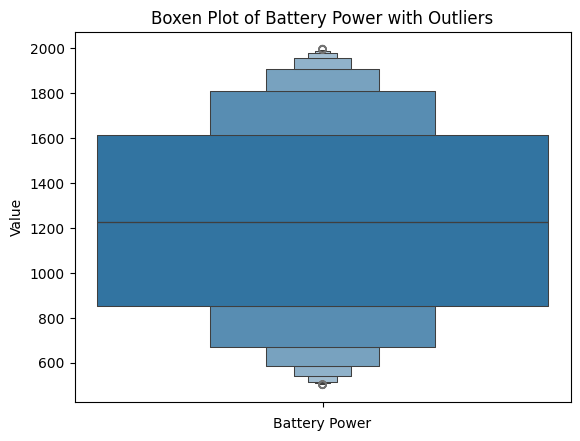

In [41]:
# Assuming 'train_df' is your DataFrame containing the 'battery_power' column
# Create the boxen plot
ax = sns.boxenplot(train_df['battery_power'])

# Add outliers to the plot
outliers = train_df[train_df['battery_power'] > ax.get_ylim()[1]]['battery_power']
ax.plot([1] * len(outliers), outliers, 'ro', alpha=0.6)  # Add red dots for outliers

# Set plot title and labels
plt.title('Boxen Plot of Battery Power with Outliers')
plt.xlabel('Battery Power')
plt.ylabel('Value')

# Show the plot
plt.show()


In [42]:
## check for outlier for numrical data
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Assuming 'df' is your DataFrame

# Calculate z-scores for each column
z_scores = np.abs(zscore(train_df))

# Create a DataFrame of boolean values indicating whether each value has a z-score greater than 3
outliers_mask = (z_scores > 3)

# Get the indices of rows and columns where the z-score is greater than 3
row_indices, column_indices = np.where(outliers_mask)

# Get the values that have a z-score greater than 3
outlier_values = train_df.values[row_indices, column_indices]

# Optionally, you can also get the corresponding row and column names
outlier_rows = train_df.index[row_indices]
outlier_columns = train_df.columns[column_indices]

# Print or further process the outlier values
print("Outlier values with z-score > 3:")
print(list(zip(outlier_rows, outlier_columns)))


Outlier values with z-score > 3:
[(95, 'fc'), (226, 'fc'), (305, 'fc'), (1387, 'fc'), (1406, 'fc'), (1416, 'fc'), (1554, 'fc'), (1693, 'fc'), (1705, 'fc'), (1880, 'fc'), (1882, 'fc'), (1888, 'fc')]


In [40]:
# all suspected outlier value in fc camera
pd.set_option('display.max_columns', None)
train_df.iloc[outlier_rows, :]
# with my little experience i see that fc mygabix in fornt cam is accepted,
# so i will not drop any data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137.0,1.0,1.0,0.0,18.0,0.0,7.0,1.0,196.0,3.0,19.0,942.0,1179.0,3616.0,13.0,5.0,12.0,1.0,1.0,1.0,3.0
226,1708.0,1.0,2.4,1.0,18.0,1.0,49.0,0.1,109.0,1.0,19.0,233.0,517.0,3388.0,6.0,4.0,16.0,1.0,1.0,1.0,3.0
305,1348.0,0.0,2.0,0.0,18.0,0.0,52.0,0.3,98.0,3.0,20.0,1869.0,1942.0,955.0,18.0,11.0,7.0,1.0,1.0,1.0,1.0
1387,1533.0,1.0,1.1,1.0,18.0,1.0,17.0,0.3,160.0,4.0,20.0,1054.0,1393.0,2520.0,8.0,2.0,11.0,1.0,0.0,1.0,2.0
1406,1731.0,1.0,2.3,1.0,18.0,0.0,60.0,0.5,171.0,4.0,20.0,142.0,1039.0,1220.0,9.0,3.0,20.0,0.0,1.0,0.0,1.0
1416,1448.0,0.0,0.5,1.0,18.0,0.0,2.0,0.2,100.0,5.0,19.0,846.0,1144.0,593.0,9.0,4.0,18.0,1.0,1.0,1.0,0.0
1554,1957.0,0.0,1.2,1.0,18.0,1.0,36.0,0.8,151.0,2.0,19.0,1194.0,1727.0,1115.0,16.0,2.0,18.0,1.0,0.0,1.0,1.0
1693,695.0,0.0,0.5,0.0,18.0,1.0,12.0,0.6,196.0,2.0,19.0,1649.0,1829.0,2855.0,16.0,13.0,7.0,1.0,1.0,1.0,2.0
1705,1290.0,1.0,1.4,1.0,19.0,1.0,35.0,0.3,110.0,4.0,20.0,405.0,742.0,879.0,16.0,2.0,8.0,1.0,0.0,0.0,0.0
1880,1720.0,0.0,1.6,0.0,18.0,1.0,2.0,0.8,188.0,5.0,20.0,334.0,896.0,2522.0,10.0,5.0,2.0,1.0,0.0,1.0,2.0


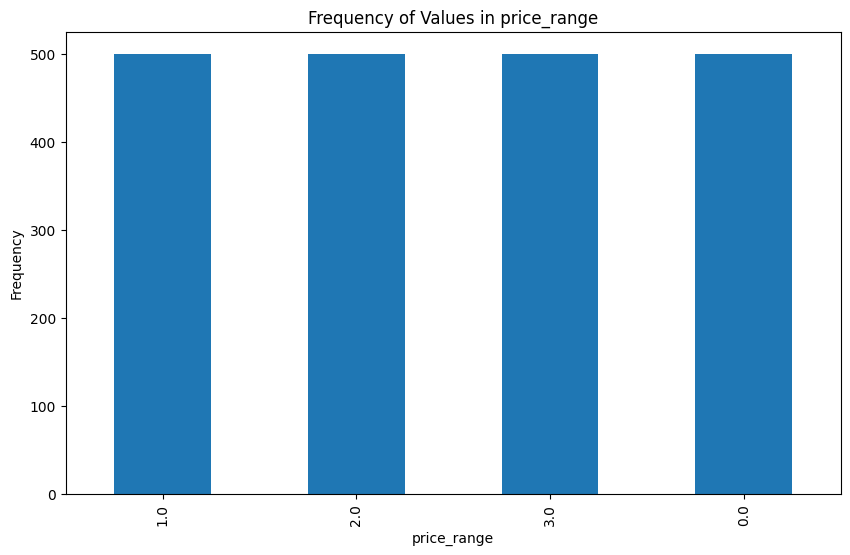

In [44]:
## let vilualize out traget to check the distribution
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to plot
column_name = 'price_range'

# Calculate the frequency of each value in the column
value_counts = train_df[column_name].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
value_counts.plot(kind='bar')

# Set plot title and labels
plt.title(f'Frequency of Values in {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')

# Show the plot
plt.show()

## I see that we are in a good data distrubiton for classes, so the probalbility of bais will be low

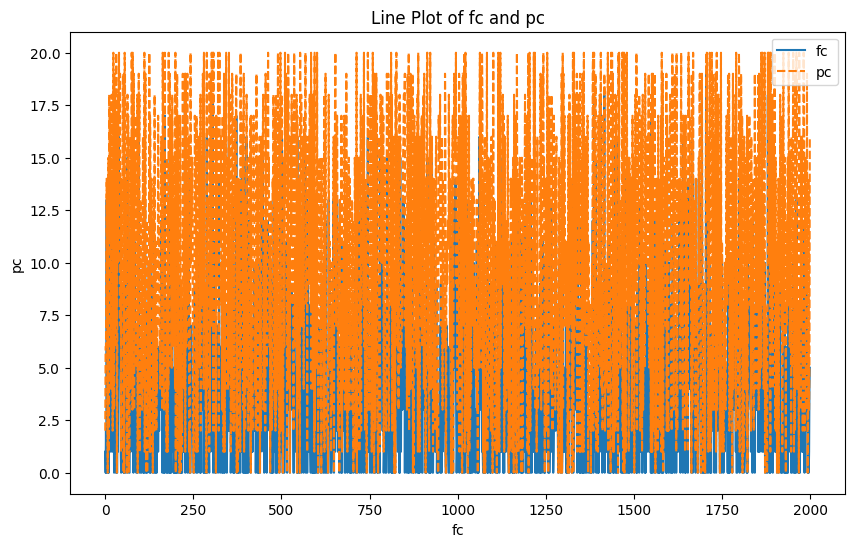

In [46]:
## visualize the fc and pc in line chart to see how much diff

# Assuming 'df' is your DataFrame and 'x_column' and 'y_column' are the columns you want to plot
x_column = 'fc'
y_column = 'pc'

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.lineplot(data=train_df[[x_column, y_column]])

# Set plot title and labels
plt.title(f'Line Plot of {x_column} and {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)

# Show the plot
plt.show()


In [51]:
### define target and trian data
target_data = train_df['price_range']
X_data = train_df.iloc[:, :-2]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0


In [53]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 893.4 kB/s eta 0:00:0000:0100:06


In [54]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, target_data, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


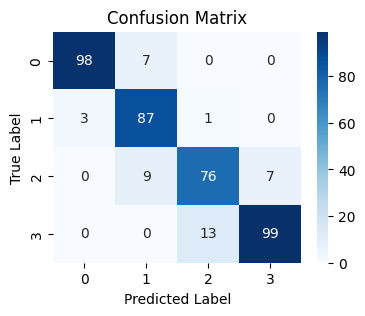

In [59]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [61]:
# model optimization using hyber paramter grid
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Initialize XGBoost classifier
model = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.92


In [63]:
# visulaize congussion for best model
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

AttributeError: 'XGBClassifier' object has no attribute 'n_classes_'

<Figure size 400x300 with 0 Axes>

In [ ]:
# save the best model
from sklearn.externals import joblib
joblib.dump(best_model, 'best_xgb_model.pkl')